AI-Powered Smart Text Analyzer:
A cutting-edge NLP tool that summarizes, paraphrases, analyzes sentiment, extracts keywords, classifies topics, evaluates readability, and generates questions—all in one place!

Loading the PEGASUS Model and Tokenizer


In [ ]:
import torch
from transformers import PegasusForConditionalGeneration, PegasusTokenizer

Initializing the PEGASUS Summarization Model

In [ ]:
import torch
from transformers import PegasusForConditionalGeneration, PegasusTokenizer

# Load model with low RAM usage
MODEL_NAME = "google/pegasus-large"
tokenizer = PegasusTokenizer.from_pretrained(MODEL_NAME)
model = PegasusForConditionalGeneration.from_pretrained(MODEL_NAME, torch_dtype=torch.float16)
model.to("cpu")  # Use "cuda" if you have GPU


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Text Summarization Function

In [ ]:
def summarize_text(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=512)

    with torch.no_grad():
        summary_ids = model.generate(
            **inputs,
            max_length=80,  # Keeps summary concise
            min_length=50,  # Prevents overly short output
            length_penalty=1.3,  # Makes sure it doesn't favor longer phrases
            num_beams=7,  # Slightly higher for better diversity
            no_repeat_ngram_size=3,  # Prevents repetition
            early_stopping=True,
            repetition_penalty=1.15  # Avoids over-favoring specific parts
        )

    return tokenizer.decode(summary_ids[0], skip_special_tokens=True)


 Generating a Summary with PEGASUS

In [ ]:
text = """Artificial Intelligence (AI) is transforming industries by automating tasks,
improving efficiency, and generating insights. From healthcare to finance, AI-powered solutions
are revolutionizing the way we work and live. However, ethical concerns around data privacy
and algorithmic bias remain significant challenges in AI development. Researchers and policymakers
are working together to ensure AI benefits society while minimizing risks."""

summary = summarize_text(text)
print("Summarized Text:\n", summary)


Summarized Text:
 From healthcare to finance, AI-powered solutions are revolutionizing the way we work and live. However, ethical concerns around data privacy and algorithmic bias remain significant challenges in AI development. Researchers and policymakers are working together to ensure AI benefits society while minimizing risks.


In [ ]:
!pip install yake

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.2/60.2 kB 2.3 MB/s eta 0:00:00


 Keyword Extraction using YAKE

In [ ]:
import yake

def extract_keywords(text, num_keywords=5):
    """Extract important keywords from the text."""
    kw_extractor = yake.KeywordExtractor()
    keywords = kw_extractor.extract_keywords(text)
    return [kw[0] for kw in keywords[:num_keywords]]

# Example usage
keywords = extract_keywords(text)
print("Keywords:", keywords)


Keywords: ['Artificial Intelligence', 'improving efficiency', 'automating tasks', 'generating insights', 'transforming industries']


Sentiment Analysis using TextBlob


In [ ]:
from textblob import TextBlob

def analyze_sentiment(text):
    """Determine sentiment polarity of the text."""
    sentiment = TextBlob(text).sentiment.polarity
    if sentiment > 0:
        return "Positive"
    elif sentiment < 0:
        return "Negative"
    else:
        return "Neutral"

# Example usage
sentiment = analyze_sentiment(text)
print("Sentiment:", sentiment)


Sentiment: Positive


In [ ]:
pip install transformers


 Topic Classification using Zero-Shot Learning

In [ ]:
from transformers import pipeline
topic_classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

def classify_topic(text):
    labels = ["Technology", "Health", "Finance", "Education", "Entertainment", "Politics", "Sports"]
    result = topic_classifier(text, candidate_labels=labels)
    return result["labels"][0]  # Most relevant topic

topic = classify_topic(text)
print("Detected Topic:", topic)


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu


Detected Topic: Technology


 Text Paraphrasing using T5 Model

In [ ]:
from transformers import pipeline

# Load paraphrasing model
paraphraser = pipeline("text2text-generation", model="t5-small")

def paraphrase_text(text):

    result = paraphraser(f"paraphrase: {text}", max_length=100, do_sample=False)
    return result[0]['generated_text']

# Example usage
paraphrased = paraphrase_text("AI is changing the world by automating tasks.")
print("Paraphrased Text:", paraphrased)


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

Device set to use cpu


Paraphrased Text: Paraphrase: AI is changing the world by automating tasks.


In [ ]:
!pip install textstat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.3/105.3 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 939.4/939.4 kB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 38.7 MB/s eta 0:00:00


Readability Analysis using TextStat


In [ ]:
import textstat

def get_readability_score(text):
    """Get Flesch reading ease score."""
    score = textstat.flesch_reading_ease(text)
    return f"Readability Score: {score} (Higher = Easier to Read)"


score = get_readability_score(text)
print(score)


Readability Score: -2.27 (Higher = Easier to Read)


Automatic Question Generation using T5 Model

In [ ]:
question_generator = pipeline("text2text-generation", model="t5-large")

def generate_questions(summary):
    """Generate a better question from the summary."""
    prompt = f"Generate a question based on this text: {summary}"
    result = question_generator(prompt, max_length=50, do_sample=True)
    return result[0]['generated_text']

# Example usage

question = generate_questions(text)
print("Generated Question:", question)


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.95G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

Device set to use cpu


Generated Question: Generate a question based on this text: What role can government play in establishing AI? We are a society of interconnected data and humans are increasingly reliant on AI, particularly in research related to health and technology


Visualizing Topic Classification Results

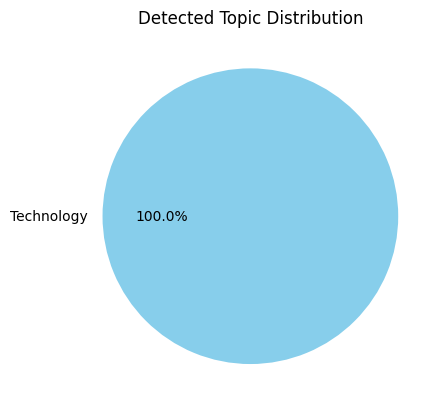

In [ ]:
import matplotlib.pyplot as plt

def plot_topic_distribution(topic):
    """Display topic classification results as a pie chart."""
    topic_data = {topic: 1}  # Only one topic per input
    plt.pie(topic_data.values(), labels=topic_data.keys(), autopct="%1.1f%%", colors=["skyblue"])
    plt.title("Detected Topic Distribution")
    plt.show()

# Example usage
plot_topic_distribution(topic)


Evaluating Summary Quality with ROUGE Score

In [ ]:
from rouge_score import rouge_scorer

def evaluate_summary(reference, generated):
    """Calculate ROUGE score between reference text and generated summary."""
    scorer = rouge_scorer.RougeScorer(["rouge1", "rouge2", "rougeL"], use_stemmer=True)
    scores = scorer.score(reference, generated)

    for key, value in scores.items():
        print(f"{key}: Precision={value.precision:.4f}, Recall={value.recall:.4f}, F1-Score={value.fmeasure:.4f}")

# Example usage
evaluate_summary(text, summary)


rouge1: Precision=0.9091, Recall=0.1724, F1-Score=0.2899
rouge2: Precision=0.5000, Recall=0.0877, F1-Score=0.1493
rougeL: Precision=0.7273, Recall=0.1379, F1-Score=0.2319
